**Práctica Clasificación**

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


Se limita el data frame a 600 columnas y 5500 filas para que no sea muy grande y no de mayores problemas.

In [64]:
df_in = pd.read_csv("/content/pd_data_initial_preprocessing.csv").set_index(["id"]).drop("emp_title", axis=1)
df_in = df_in.sample(n=6000)
df_in

<ipython-input-64-72a0ba0ce494>:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



,url,zip_code,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,total_cu_tl,...,initial_list_status,application_type,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
id,,,,,,,,,,,,,,,,,,,,,
118164095,https://lendingclub.com/browse/loanDetail.acti...,785xx,NaN,NaN,NaN,NaN,22.0,0.0,689.0,0.0,...,w,Individual,0.0,0.0,5000.0,0.0,62.0,3.0,6.0,2012.0
105121450,https://lendingclub.com/browse/loanDetail.acti...,021xx,NaN,26.0,NaN,116.0,71.0,0.0,5853.0,0.0,...,f,Individual,0.0,0.0,22000.0,0.0,149.0,18.0,8.0,2004.0
46773839,https://lendingclub.com/browse/loanDetail.acti...,957xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,w,Individual,0.0,0.0,28000.0,2.0,173.0,14.0,10.0,1999.0
36118622,https://lendingclub.com/browse/loanDetail.acti...,328xx,109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,w,Individual,1.0,1.0,20000.0,0.0,171.0,14.0,8.0,2000.0
57234886,https://lendingclub.com/browse/loanDetail.acti...,479xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,w,Individual,0.0,0.0,8000.0,0.0,107.0,10.0,9.0,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107236007,https://lendingclub.com/browse/loanDetail.acti...,852xx,79.0,96.0,NaN,14.0,95.0,1.0,6259.0,0.0,...,w,Individual,1.0,1.0,8000.0,1.0,131.0,10.0,1.0,2004.0
30425764,https://lendingclub.com/browse/loanDetail.acti...,300xx,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,w,Individual,1.0,1.0,10000.0,2.0,220.0,8.0,6.0,1996.0
65353964,https://lendingclub.com/browse/loanDetail.acti...,765xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,w,Individual,0.0,0.0,35000.0,1.0,209.0,10.0,6.0,1998.0


In [65]:
df_in.shape

(6000, 49)

In [66]:
df_in.to_csv('/content/prepocesado_sample.csv', index=False)

###<code> 1 </code
Análisis descriptivo de los datos.

1.1 Cantidad de valores nulos.


In [67]:
null_vn = df_in.isna().sum().sum()
print(null_vn)

82095


In [68]:
pernull = (df_in.isnull().sum() / len(df_in)) * 100
print(pernull)

url                                0.000000
zip_code                           0.000000
mths_since_last_record            83.466667
il_util                           75.933333
mths_since_recent_bc_dlq          74.783333
mths_since_rcnt_il                72.916667
all_util                          72.133333
inq_fi                            72.133333
max_bal_bc                        72.133333
total_cu_tl                       72.133333
open_acc_6m                       72.133333
open_act_il                       72.133333
open_il_12m                       72.133333
total_bal_il                      72.133333
open_rv_12m                       72.133333
open_rv_24m                       72.133333
open_il_24m                       72.133333
inq_last_12m                      72.133333
mths_since_last_major_derog       72.000000
mths_since_recent_revol_delinq    65.416667
mths_since_last_delinq            49.400000
emp_length                         5.633333
mo_sin_old_il_acct              

Valores nulos por columna

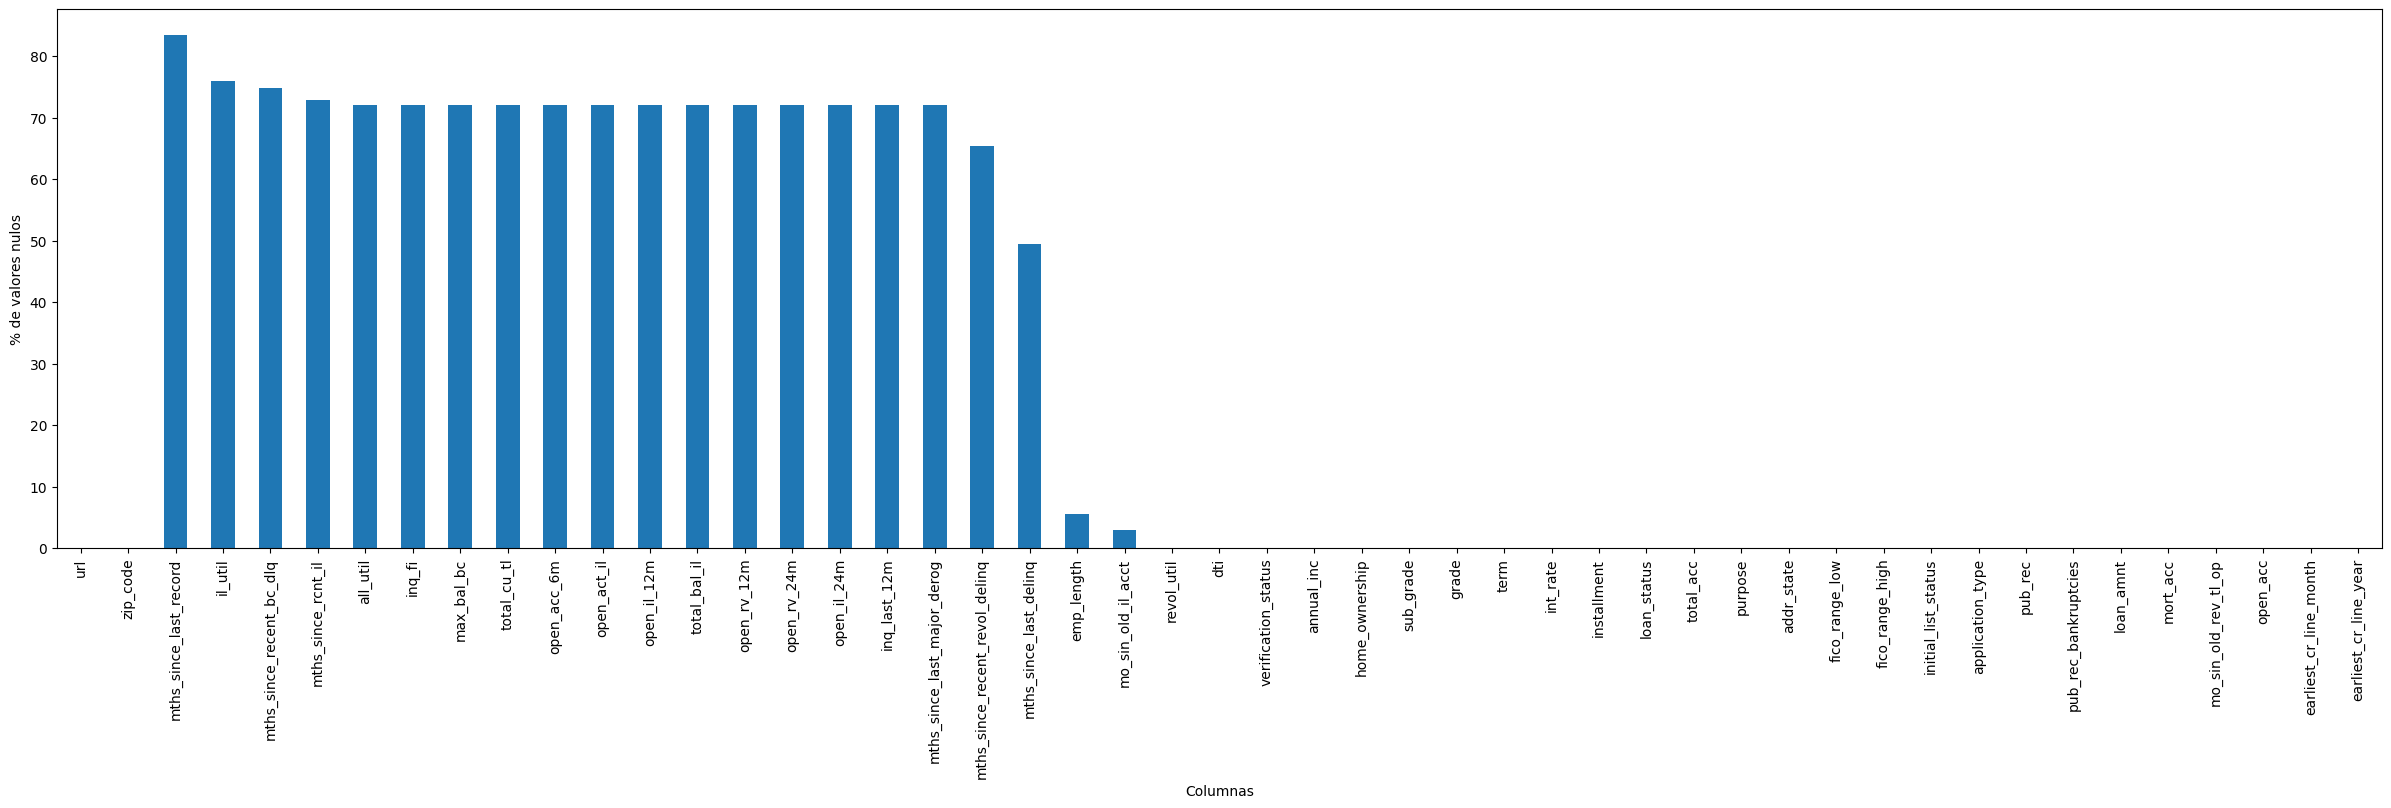

In [69]:
plt.figure(figsize=(30, 7))
ax = pernull.plot(kind='bar')
ax.set_xlabel('Columnas')
ax.set_ylabel('% de valores nulos')
plt.show()

Porcentaje de las variables de los valores nulos.

In [70]:
null_vc = df_in.isna().sum()
print(null_vc)

url                                  0
zip_code                             0
mths_since_last_record            5008
il_util                           4556
mths_since_recent_bc_dlq          4487
mths_since_rcnt_il                4375
all_util                          4328
inq_fi                            4328
max_bal_bc                        4328
total_cu_tl                       4328
open_acc_6m                       4328
open_act_il                       4328
open_il_12m                       4328
total_bal_il                      4328
open_rv_12m                       4328
open_rv_24m                       4328
open_il_24m                       4328
inq_last_12m                      4328
mths_since_last_major_derog       4320
mths_since_recent_revol_delinq    3925
mths_since_last_delinq            2964
emp_length                         338
mo_sin_old_il_acct                 180
revol_util                           3
dti                                  3
verification_status      

1.2 Tipo de variables (cat, float, etc.)

In [71]:
df_types = df_in.dtypes
print(df_types)

url                                object
zip_code                           object
mths_since_last_record            float64
il_util                           float64
mths_since_recent_bc_dlq          float64
mths_since_rcnt_il                float64
all_util                          float64
inq_fi                            float64
max_bal_bc                        float64
total_cu_tl                       float64
open_acc_6m                       float64
open_act_il                       float64
open_il_12m                       float64
total_bal_il                      float64
open_rv_12m                       float64
open_rv_24m                       float64
open_il_24m                       float64
inq_last_12m                      float64
mths_since_last_major_derog       float64
mths_since_recent_revol_delinq    float64
mths_since_last_delinq            float64
emp_length                        float64
mo_sin_old_il_acct                float64
revol_util                        

1.3 En la variable objetivo, distribución de sus valores. Usando "loan_status", definiendo si un cliente pagara su hipoteca o no.

Sacar valores que toma la variable

In [72]:
val_ls = df_in["loan_status"].unique()
print(val_ls)

['Current' 'Fully Paid' 'Late (31-120 days)' 'Charged Off'
 'Late (16-30 days)' 'In Grace Period']


Numero de hipotecas que comprende cada status y porcentaje.

In [73]:
ls_pl = df_in["loan_status"].value_counts(normalize=True).mul(100).rename("%").reset_index()
ls_pl_cont = df_in["loan_status"].value_counts().reset_index()
ls_me = pd.merge(ls_pl, ls_pl_cont)
ls_me

,loan_status,%,count
0,Current,48.400000,2904
1,Fully Paid,39.133333,2348
2,Charged Off,10.433333,626
3,Late (31-120 days),1.116667,67
4,In Grace Period,0.550000,33
5,Late (16-30 days),0.366667,22


Es evidente que la mayoría de los préstamos actualmente están siendo pagados puntualmente o ya han sido saldados por completo. Aunque el número de préstamos pendientes o en mora es relativamente bajo en comparación con el total, es crucial desarrollar modelos financieros que nos ayuden a identificar a los clientes con riesgo de incumplimiento y así evitar otorgarles nuevos préstamos.

In [74]:
barras_plot = px.bar(ls_me, x = "loan_status", y = "%")
barras_plot


Alrededor del 47% de los clientes tienen el estado del préstamo marcado como "current", casi el 40% se encuentra en el estado "fully paid", y un poco más del 10% está catalogado como "charged off". Los demás estados representan una minoría. Ahora, me gustaría investigar más sobre los préstamos que ya han sido otorgados y completados, para distinguir cuáles fueron pagados correctamente y cuáles fueron cancelados

In [75]:
df_tmd = df_in[(df_in["loan_status"]=="Fully Paid") | (df_in["loan_status"]=="Charged Off")]
df_tmd.shape

(2974, 49)

In [76]:
ls_plot_t = df_tmd["loan_status"].value_counts(normalize=True).mul(100).rename("%").reset_index()
ls_plot_cont_t = df_tmd["loan_status"].value_counts().reset_index()
ls_mer = pd.merge(ls_plot_t, ls_plot_cont_t)
ls_mer

,loan_status,%,count
0,Fully Paid,78.950908,2348
1,Charged Off,21.049092,626


In [77]:
bar_plot = px.bar(ls_mer, x = "loan_status", y = "%")
bar_plot


Podemos observar como el impago es muy bajo ya que la gran mayoria paga al completo como podemos ver con el grafico en "Fully Paid"

1.4 Matriz de correlación en variables continuas.

Primero sacamos todas las variables continua del dataframe y luego hacemos la matriz solo usando esas variables previmente selecionadas

In [78]:
var_c = df_in.select_dtypes(include=["float64", "int64"])


<Figure size 1000x800 with 0 Axes>

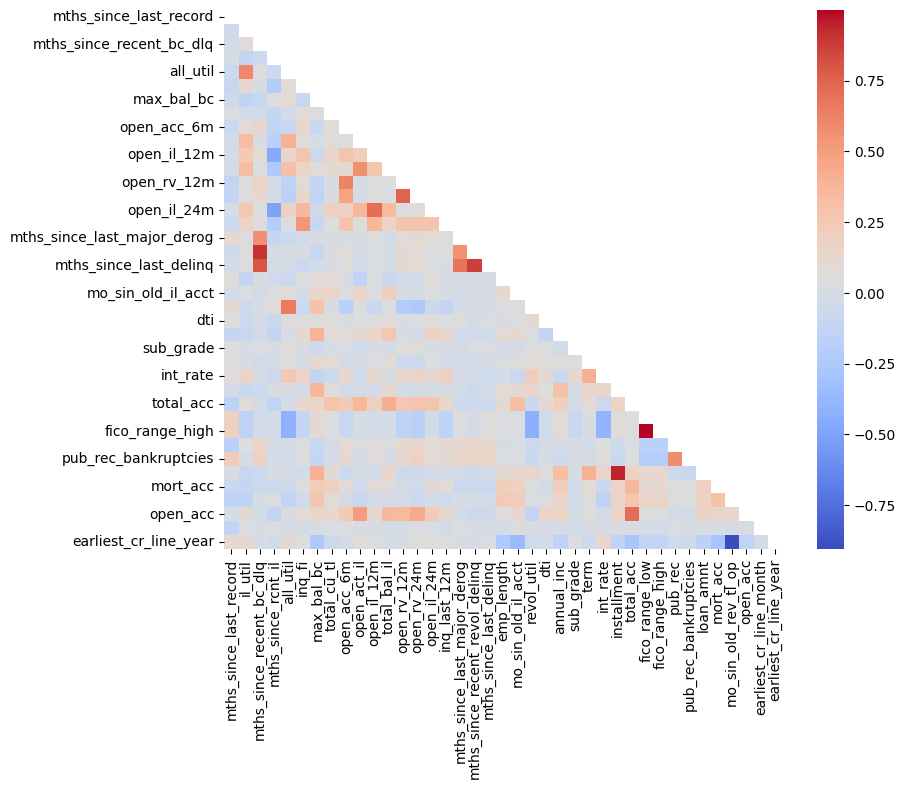

In [79]:
mat_c = var_c.corr()
plt.figure(figsize=(10, 8))
msk = np.triu(np.ones_like(mat_c, dtype=bool)) #para mostrar solo la parte inferior de la matriz
plt.figure(figsize=(9, 7))
sns.heatmap(mat_c, cmap='coolwarm', mask = msk)
plt.show()

Elaboré un mapa de calor para visualizar las correlaciones entre las numerosas variables continuas. Destaco algunas relaciones significativas, como la fuerte correlación entre el tiempo transcurrido desde el último impago en la tarjeta bancaria y el período desde la última morosidad revolving. También se observa una correlación marcada entre el rango límite superior e inferior del puntaje FICO del prestatario al momento de originar el préstamo. El puntaje FICO, una puntuación de tres dígitos que oscila generalmente entre 300 y 850, indica a los prestamistas la probabilidad de que un consumidor reembolse el préstamo en función de su historial crediticio. Otra relación notable se encuentra entre la cantidad del préstamo y los pagos mensuales. Además, se destaca una correlación negativa considerable entre la variable earliest_cr_line_year (indicando el año en que se abrió la primera línea de crédito del prestatario) y mort_acc (número de cuentas hipotecarias).

###<code> 2 </code
Tratar los valores missing tanto en las variables continuas como discretas de forma correcta. Recordad que si existen muchos valores missing no es adecuado eliminar dichas filas.

Variables categoricas

In [80]:
  def var_cat(dataset=None):
    if dataset is None:
        print(u'\nFaltan argumentos por pasar a la función')
        return 1
    list_cat = []
    other = []
    for i in dataset.columns:
        if (dataset[i].dtype ==object):
                      list_cat.append(i)
        else:
           other.append(i)
    return list_cat, other

Se obtiene dentro del dataframe una lista de todas las variables categoricas.

In [81]:
list_cat, other = var_cat(dataset = df_in)
list_cat

['url',
 'zip_code',
 'verification_status',
 'home_ownership',
 'grade',
 'loan_status',
 'purpose',
 'addr_state',
 'initial_list_status',
 'application_type']

In [82]:
df_in[list_cat] =df_in[list_cat].fillna('SIN VALOR')

In [83]:
nul_c = df_in[list_cat].isnull().sum()
nul_c

url                    0
zip_code               0
verification_status    0
home_ownership         0
grade                  0
loan_status            0
purpose                0
addr_state             0
initial_list_status    0
application_type       0
dtype: int64

Ya no hay valores nulos

Según las instrucciones proporcionadas, los valores faltantes de las variables continuas se reemplazarán con la media. Sin embargo, es importante tener en cuenta que también se podrían sustituir utilizando la mediana, la moda, valores extremos o incluso mediante el algoritmo KNN.

In [84]:
 def var_cat(dataset=None):
    if dataset is None:
        print(u'\nFaltan argumentos por pasar a la función')
        return 1
    list_cat = []
    other = []
    for i in dataset.columns:
        if (dataset[i].dtype!=object):
                      list_cat.append(i)
        else:
           other.append(i)
    return list_cat, other

Esta función nos permite obetener una lista de todas las variables numericas del dataframe.

In [85]:
list_num, other = var_cat(dataset = df_in)
list_num

['mths_since_last_record',
 'il_util',
 'mths_since_recent_bc_dlq',
 'mths_since_rcnt_il',
 'all_util',
 'inq_fi',
 'max_bal_bc',
 'total_cu_tl',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'total_bal_il',
 'open_rv_12m',
 'open_rv_24m',
 'open_il_24m',
 'inq_last_12m',
 'mths_since_last_major_derog',
 'mths_since_recent_revol_delinq',
 'mths_since_last_delinq',
 'emp_length',
 'mo_sin_old_il_acct',
 'revol_util',
 'dti',
 'annual_inc',
 'sub_grade',
 'term',
 'int_rate',
 'installment',
 'total_acc',
 'fico_range_low',
 'fico_range_high',
 'pub_rec',
 'pub_rec_bankruptcies',
 'loan_amnt',
 'mort_acc',
 'mo_sin_old_rev_tl_op',
 'open_acc',
 'earliest_cr_line_month',
 'earliest_cr_line_year']

Sustituir por media de las variables continuas.

In [86]:
df_in[list_num] =df_in[list_num].fillna(df_in[list_num].mean())

In [87]:
df_in.isna().sum()

url                               0
zip_code                          0
mths_since_last_record            0
il_util                           0
mths_since_recent_bc_dlq          0
mths_since_rcnt_il                0
all_util                          0
inq_fi                            0
max_bal_bc                        0
total_cu_tl                       0
open_acc_6m                       0
open_act_il                       0
open_il_12m                       0
total_bal_il                      0
open_rv_12m                       0
open_rv_24m                       0
open_il_24m                       0
inq_last_12m                      0
mths_since_last_major_derog       0
mths_since_recent_revol_delinq    0
mths_since_last_delinq            0
emp_length                        0
mo_sin_old_il_acct                0
revol_util                        0
dti                               0
verification_status               0
annual_inc                        0
home_ownership              

Podemos observar como ya no hay valores missing

###<code> 3 </code
Transformar las variables continuas, si fuera necesario, y las categóricas correctamente.

Eliminar columnas que no son muy relevantes, en este caso creo que las tres primeras no lo son por lo que las voy a eliminar

In [88]:
df_in = df_in.drop(["zip_code", "url"], axis = 1)
df_in.head(5)

,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,total_cu_tl,open_acc_6m,open_act_il,...,initial_list_status,application_type,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
id,,,,,,,,,,,,,,,,,,,,,
118164095,68.78125,69.661357,38.956378,20.916308,22.000000,0.000000,689.000000,0.000000,0.000000,0.000000,...,w,Individual,0.0,0.0,5000.0,0.0,62.0,3.0,6.0,2012.0
105121450,68.78125,26.000000,38.956378,116.000000,71.000000,0.000000,5853.000000,0.000000,1.000000,4.000000,...,f,Individual,0.0,0.0,22000.0,0.0,149.0,18.0,8.0,2004.0
46773839,68.78125,69.661357,38.956378,20.916308,58.190191,0.994617,5673.409091,1.351675,0.860048,2.893541,...,w,Individual,0.0,0.0,28000.0,2.0,173.0,14.0,10.0,1999.0
36118622,109.00000,69.661357,38.956378,20.916308,58.190191,0.994617,5673.409091,1.351675,0.860048,2.893541,...,w,Individual,1.0,1.0,20000.0,0.0,171.0,14.0,8.0,2000.0
57234886,68.78125,69.661357,38.956378,20.916308,58.190191,0.994617,5673.409091,1.351675,0.860048,2.893541,...,w,Individual,0.0,0.0,8000.0,0.0,107.0,10.0,9.0,2004.0


 Se debe hacer primero un pequeño analisis de las variables para luego hacer una transformacion de las variables.

In [89]:
df_in.select_dtypes(include=["object"]).nunique()

verification_status     3
home_ownership          3
grade                   7
loan_status             6
purpose                12
addr_state             50
initial_list_status     2
application_type        2
dtype: int64

Hay que destacar como la columna addr_state tiene 50 valores mostrando el estado del prestario, lo cual es mucho. Es seguido por el purpose

In [90]:
df_in["addr_state"].unique()

array(['TX', 'MA', 'CA', 'FL', 'IN', 'NJ', 'CO', 'AR', 'GA', 'AZ', 'NY',
       'CT', 'OH', 'NH', 'PA', 'IL', 'WY', 'NC', 'WI', 'SC', 'MN', 'MI',
       'KS', 'DC', 'LA', 'VT', 'VA', 'MD', 'WA', 'HI', 'ME', 'MT', 'OK',
       'TN', 'UT', 'RI', 'AL', 'OR', 'KY', 'MS', 'NV', 'ND', 'MO', 'NE',
       'NM', 'AK', 'WV', 'DE', 'SD', 'ID'], dtype=object)

se clasifican segun la orientazion en la que se encuentran en el mapa, northeast, south, midwest, west.


In [91]:
regions = {
    'Northeast': ['CT', 'MA', 'ME', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT'],
    'Midwest': ['IA', 'IL', 'IN', 'KS', 'MI', 'MN', 'MO', 'ND', 'NE', 'OH', 'SD', 'WI'],
    'South': ['AL', 'AR', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV'],
    'West': ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']
}

Ahora haremos una funcion para que se cree una nueva columna con la localizacion de cada codigo de estado

In [92]:
def location(state_zip):
    for region, states in regions.items():
        if state_zip in states:
            return region
    return 'other'

In [93]:
df_in['region'] = df_in['addr_state'].apply(location)


Se borra addr_state

In [94]:
df_in = df_in.drop('addr_state', axis=1)

Primero veamos cuáles son los tres valores que más se repiten en la variable 'purpose':

Consolidation.
Home improvement.
Credit card.
Ahora podemos proceder a transformar la variable, dejando estos tres valores principales y sustituyendo los demás por "other"

In [95]:
df_in.purpose.value_counts().head(5)

purpose
debt_consolidation    3532
credit_card           1415
home_improvement       370
other                  294
major_purchase         118
Name: count, dtype: int64

Los que mas se repiten, *debt_consolidation*, *credit_card* y
*home_improvement*.

In [96]:
mant_val = ["debt_consolidation", "credit_card", "home_improvement", "other"]

Funcion para sustituir valores.

In [97]:
def sust_purpose(value):
    if value in mant_val:
        return value
    else:
        return "other"

In [98]:
df_in['purpose'] = df_in['purpose'].apply(sust_purpose)
df_in.purpose.unique()

array(['debt_consolidation', 'credit_card', 'home_improvement', 'other'],
      dtype=object)

Ahora transformaremos la variable *grade*

In [99]:
df_in.grade.unique()

array(['C', 'B', 'A', 'E', 'D', 'F', 'G'], dtype=object)

Tranformare a numericas las notas siendo la mas alta un 6 que es igual a la A y la mas baja un 0 igual a G.

In [100]:
grades = {"A":6, "B":5, "C":4, "D":3, "E":2, "F":1, "G":0}
df_in.grade = df_in.grade.replace(grades)
df_in.grade.unique()

array([4, 5, 6, 2, 3, 1, 0])

In [101]:
df_in.application_type.unique()

array(['Individual', 'Joint App'], dtype=object)

In [102]:
df_in.initial_list_status.unique()

array(['w', 'f'], dtype=object)

Vamos a realizar las transformaciones necesarias en las variables 'initial_list_status' y 'application_type', así como la reducción de la base de datos para incluir solo los clientes cuyos préstamos estén marcados como 'fully paid' o 'charged off'.

Transformación de 'initial_list_status' y 'application_type':
'initial_list_status': Transformaremos 'F' a 1 y 'W' a 0.
'application_type': Si el préstamo es individual, lo representaremos como 1, y si es conjunto, como 0.

Reducción de la base de datos:
Mantendremos solo los préstamos marcados como 'fully paid' o 'charged off'.
Reemplazaremos 'fully paid' con 1 y 'charged off' con 0.

Vamos a realizar estas transformaciones.




In [103]:
#loan_status
df_in = df_in[(df_in.loan_status=="Fully Paid")|(df_in.loan_status=="Charged Off")]
ls = {"Fully Paid":1, "Charged Off": 0}
df_in.loan_status = df_in.loan_status.replace(ls)

#initial_list
init_stat = {"f":1, "w": 0}
df_in.initial_list_status = df_in.initial_list_status.replace(init_stat)

#application_type
app_ty = {"Joint App": 1, "Inidividual":0}
df_in.application_type = df_in.application_type.replace(app_ty)


In [104]:
df_in.loan_status.shape

(2974,)

In [105]:
groups = df_in.groupby('loan_status')
sample = groups.apply(lambda x: x.sample(n=10))
df2 = sample.reset_index(drop=True)

Voy a aplicar un *get_dummies* a todas las columnas excepto a la variable objetivo.

In [106]:
excluded_cols = ['loan_status']
categorical_cols_1 = [col for col in df2.columns if col not in excluded_cols]
df2 = pd.get_dummies(df2, columns=categorical_cols_1)

In [107]:
cont = df2["loan_status"].value_counts()
balance = cont/len(df2)
balance

loan_status
0    0.5
1    0.5
Name: count, dtype: float64

###<code> 4 </code
Para dividir el conjunto de datos en subconjuntos de entrenamiento y prueba, es esencial mantener las proporciones originales de la variable objetivo, especialmente si está desequilibrada. Esto se puede lograr utilizando una técnica de partición estratificada.

Primero voy a comprobar si la variable objetivo esta desbalanceada o no.

In [108]:
random_state = 100
df_train, df_test = train_test_split(df2, test_size = 0.3, random_state = random_state, stratify = df2.loan_status)

In [109]:
#train
x_train = df_train.drop(columns="loan_status")
y_train = df_train["loan_status"]

#test
x_test = df_test.drop(columns="loan_status")
y_test = df_test["loan_status"]

In [110]:
print(x_train.shape)
print(x_test.shape)

(14, 356)
(6, 356)


###<code> 5 </code
Vamos a evaluar varios algoritmos de clasificación, siguiendo estos pasos:

Aplicar transformaciones si es necesario:
Si algún algoritmo requiere transformaciones como escalado o normalización de los datos, las aplicaremos en esta etapa.
Entrenar el modelo con el conjunto de entrenamiento:
Utilizaremos el conjunto de datos de entrenamiento para ajustar los parámetros del modelo y hacer que se adapte a los datos disponibles.
Evaluar el rendimiento del modelo:
Tras el entrenamiento, evaluaremos qué tan bien se desempeñó el modelo en el conjunto de entrenamiento. Esto nos dará una idea inicial de su capacidad para aprender de los datos.
Evaluar el modelo con el conjunto de prueba:
Posteriormente, evaluaremos el modelo utilizando el conjunto de datos de prueba. Esto nos permitirá determinar cómo generaliza el modelo a datos nuevos y no vistos durante el entrenamiento.


Los algoritmos que queremos probar son:
* Regresión logistica
* KNN
* Arbol de decisión simple
* Bagging Classifier
* Random Forest
* GradientBoost

Para cada uno de estos algoritmos se nos exige que los evlaemos utilizando las siguientes metricas:
* Accurary
* Precision
* Recalf
* Confusion Matrix
* F-Score
* Curva ROC y area bajo curva
Sobre estos decidiremos cual es el mejor para nuestro casol.


###<code>__**5.1 Regresion logistica**__</code>

In [111]:
log_scaler = StandardScaler()
log_scaler.fit(x_train)

StandardScaler()

Procederemos ahora a entrenar el modelo

In [112]:
x_train_sld = log_scaler.transform(x_train)
lr = LogisticRegression()
lr.fit(x_train_sld, y_train)

LogisticRegression()

Sacamos el accuracy del modelo train

In [113]:
lr.score(x_train_sld, y_train)

1.0

Hemos logrado un accuracy del 100% en el conjunto de entrenamiento, lo que indica que el modelo se ha ajustado perfectamente a esos datos. Ahora es importante evaluar su rendimiento en el conjunto de prueba para confirmar su capacidad de generalización a datos no vistos durante el entrenamiento.

In [114]:
x_test_sld = log_scaler.transform(x_test)
#accuracy del conjunto test
lr_model = lr.score(x_test_sld, y_test)


Obtenemos un accuracy de 0.5751 en el conjunto de datos test, lo que nos indica que no esta siendo muy preciso en la clasificacion de datos test. Una posible causa puede ser que no este generalizando bien los datos.
Haremos ahora la precision

In [115]:
pred_proba_lr = lr_model.predict_proba(x_test_sld)[:,1]
pred_lr = lr_model.predict(x_test_sld)

out_lr = (df_test.assign(pred_prob=pred_proba_lr).assign(pred_flag=pred_lr).loc[:,["loan_status","pred_prob", "pred_flag"]])
out_lr

AttributeError: 'numpy.float64' object has no attribute 'predict_proba'

In [116]:
from sklearn.metrics import precision_score

precision_lr = precision_score(out_lr["loan_status"], out_lr["pred_flag"])
precision_lr

NameError: name 'out_lr' is not defined

Una precision del 57.5% indica que nuestro modelo solo clasifica correctamente el 57,5% de los datos positivos dentro de test. No es ni excelente ni malo.

In [117]:
#recall
from sklearn.metrics import recall_score

recall_lr = recall_score(out_lr["loan_status"], out_lr["pred_flag"])
recall_lr

NameError: name 'out_lr' is not defined

El valor del recall nos sugiere que el modelo no esta seindo muy sensible a la identificacion de muestras positivas, solo un 57.58% en los datos de prueba de la regresion logistica.

In [118]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cmat_lr = confusion_matrix(out_lr["loan_status"], out_lr["pred_flag"])
cmat_lr

#table
cmat_tab_lr = pd.DataFrame(index=["RealNo", "RealSi"], columns = ["PredNo", "PredSi"], data = cmat_lr)
cmat_tab_lr

NameError: name 'out_lr' is not defined

Las filas son los datos realos, y en las columnas son las predicciones.

In [ ]:
#fscore
from sklearn.metrics import f1_score

fscore_lr = f1_score(out_lr["loan_status"], out_lr["pred_flag"])
fscore_lr

0.5649948822927328

El F-score es la media armónica ponderada de la Precisión y el Recall. Esto implica que este puntaje es alto solo cuando tanto la Precisión como el Recall son altos, y bajo cuando alguno de ellos es bajo. El F-score ayuda al usuario a obtener una evaluación precisa de qué tan bien está funcionando su algoritmo.

Por lo tanto, un F-score de 0.5754 en los datos de prueba de la regresión logística indica que el modelo está encontrando un cierto equilibrio entre la Precisión y el Recall. Sin embargo, aún existe margen para mejorar el rendimiento del modelo.








In [119]:
#Curva ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#probabilidades de prediccion en el conjunto test
y_score_lr = log_model.predict_proba(x_test_sld)[:, 1]

fpr, tpr, thersholds=roc_curve(y_test, y_score_lr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


NameError: name 'log_model' is not defined

In [ ]:
#AUC
auc_score_lr = roc_auc_score(out_lr["loan_status"], out_lr["pred_flag"])
auc_score_lr

0.5641025641025641

El AUC score es una métrica que evalúa la capacidad del modelo para discernir entre clases positivas y negativas, donde un valor de 1 representa un rendimiento perfecto y 0.5 indica un rendimiento similar al de un clasificador aleatorio. Un valor de 0.5986 sugiere que el modelo supera a un clasificador aleatorio, pero aún tiene margen para mejorar en su habilidad para distinguir entre las clases.

Una vez más, el área bajo la curva ROC nos indica que este modelo es relativamente mediocre, ya que no logra un rendimiento óptimo en la clasificación de instancias positivas y negativas.








###<code> 5.2 K-NN </code>




In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_sld, y_train)
knn.score(x_train_sld, y_train)

0.7263736263736263

Un accuracy de 0.726 en los datos de entrenamiento de una regresión KNN indica que el modelo ha clasificado correctamente aproximadamente el 72.6% de las instancias de entrenamiento. Ahora procederemos a calcular el accuracy en el conjunto de datos de prueba, que es crucial para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.

In [ ]:
knn_model = knn.score(x_test_sld, y_test)
knn_model

0.5238461538461539

Un accuracy de 52.38% indica que en los datos de prueba de una regresion kNN, el modelo tiene un rendimeinto mediocre a la hora de clasificar nuevas muestras.
haremos lo mismo, creadno una tabla para la precision

Evaluamos el modelo

In [ ]:
pred_proba_knn = knn.predict_proba(x_test_sld)[:,1]
pred_knn = knn.predict(x_test_sld)

out_knn = (df_test.assign(pred_prob=pred_proba_knn).assign(pred_flag=pred_knn).loc[:,["loan_status","pred_prob", "pred_flag"]])
out_knn

,loan_status,pred_prob,pred_flag
4158,0,0.4,0
5717,0,0.4,0
11576,1,0.2,0
9173,1,0.4,0
11411,1,0.6,1
...,...,...,...
9743,1,0.6,1
4855,0,0.6,1
3280,0,0.6,1
7321,1,0.6,1


In [ ]:
#precision
precision_knn = precision_score(out_knn["loan_status"], out_knn["pred_flag"])
precision_knn

0.5514950166112956

El modelo clasifica el 60,35% de las instancias que ha predicho como positivas.

In [ ]:
#recall
recall_knn = recall_score(out_knn["loan_status"], out_knn["pred_flag"])
recall_knn

0.2553846153846154

El valor del recall nos sugiere que el modelo no esta seindo muy sensible a la identificacion de muestras positivas, solo un 25.53% en los datos de prueba de la regresion logistica.

In [ ]:
#confusion matrix
cmat_knn = confusion_matrix(out_knn["loan_status"], out_knn["pred_flag"])
cmat_knn

#table
cmat_tab_knn = pd.DataFrame(index=["RealNo", "RealSi"], columns = ["PredNo", "PredSi"], data = cmat_knn)
cmat_tab_knn

,PredNo,PredSi
RealNo,1545,405
RealSi,1452,498


In [ ]:
#f-score
fscore_knn = f1_score(out_knn["loan_status"], out_knn["pred_flag"])
fscore_knn

0.34910620399579384

Un F-score de 0.349 en los datos de prueba de una regresión KNN sugiere que el modelo tiene un rendimiento limitado en la clasificación correcta de instancias positivas y negativas. Parece que el modelo no está logrando un equilibrio adecuado entre la precisión y el recall, lo que indica que podría estar perdiendo una cantidad significativa de instancias positivas o negativas. Esto sugiere que el modelo necesita mejoras para clasificar de manera más precisa ambas clases.

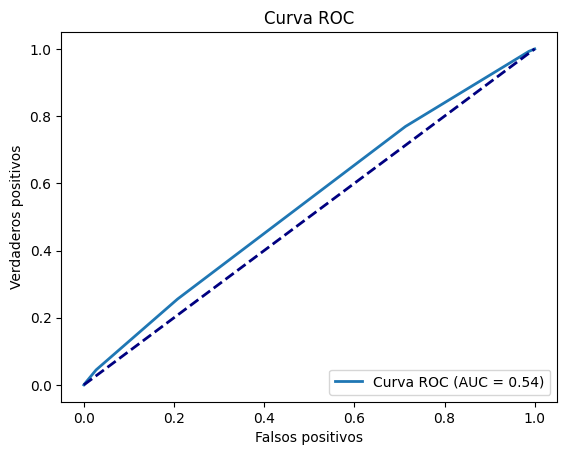

In [ ]:
#curva roc
y_score_knn = knn.predict_proba(x_test_sld)[:, 1]

fpr, tpr, thersholds=roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#auc
auc_score_knn = roc_auc_score(out_knn["loan_status"], out_knn["pred_flag"])
auc_score_knn

0.5238461538461537

Una vez más, gracias al área bajo la curva ROC, podemos confirmar que este modelo es bastante mediocre, ya que no muestra un buen rendimiento en la clasificación de instancias positivas y negativas. Esto sugiere que el modelo puede estar teniendo dificultades para diferenciar entre las dos clases, lo que indica una necesidad de mejora en su capacidad de discriminación entre las clases positivas y negativas.








###<code> 5.3 Arbol de decisión simple </code>



In [ ]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(x_train_sld, y_train)
tree.score(x_train_sld, y_train)

0.6493406593406593

In [ ]:
tree_model = tree.score(x_test_sld, y_test)
tree_model

0.6269230769230769

Un accuracy de 0.627 es un rendimiento moderado en la correcta clasificacion de muestras.

Evaluamos el modelo

In [ ]:
pred_proba_tree = tree.predict_proba(x_test_sld)[:,1]
pred_tree = tree.predict(x_test_sld)

out_tree = (df_test.assign(pred_prob=pred_proba_tree).assign(pred_flag=pred_tree).loc[:,["loan_status","pred_prob", "pred_flag"]])
out_tree

,loan_status,pred_prob,pred_flag
4158,0,0.395693,0
5717,0,0.518121,1
11576,1,0.518121,1
9173,1,0.518121,1
11411,1,0.518121,1
...,...,...,...
9743,1,0.395693,0
4855,0,0.660290,1
3280,0,0.660290,1
7321,1,0.713450,1


In [ ]:
#precision
precision_tree = precision_score(out_tree["loan_status"], out_tree["pred_flag"])
precision_tree


0.6168003775365739

Un valor de precisión de 0.61709 en los datos de prueba de un árbol de clasificación indica que el modelo está clasificando correctamente alrededor del 61% de las instancias positivas en el conjunto de prueba.

In [ ]:
#recall
recall_tree = recall_score(out_tree["loan_status"], out_tree["pred_flag"])
recall_tree

0.6702564102564103

In [ ]:
#confusion matrix
cmat_tree = confusion_matrix(out_tree["loan_status"], out_tree["pred_flag"])
cmat_tree

#table
cmat_tab_tree = pd.DataFrame(index=["RealNo", "RealSi"], columns = ["PredNo", "PredSi"], data = cmat_tree)
cmat_tab_tree

,PredNo,PredSi
RealNo,1138,812
RealSi,643,1307


In [ ]:
#f_score
fscore_tree = f1_score(out_tree["loan_status"], out_tree["pred_flag"])
fscore_tree

0.6424182845908086

Un valor de F1-score de 0.6425 en los datos de prueba de un árbol de clasificación indica que el modelo tiene un rendimiento moderado en términos de precisión y recall en el conjunto de prueba. Esto sugiere que el modelo logra un equilibrio aceptable entre la precisión y el recall, lo que lo hace efectivo para clasificar instancias tanto positivas como negativas en el conjunto de prueba.

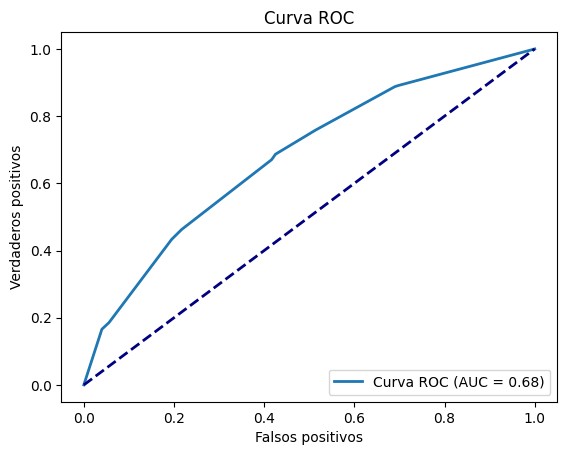

In [ ]:
#curva roc
y_score_tree = tree.predict_proba(x_test_sld)[:, 1]

fpr, tpr, thersholds=roc_curve(y_test, y_score_tree)
roc_auc_tree = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#auc
auc_score_tree = roc_auc_score(out_tree["loan_status"], out_tree["pred_flag"])
auc_score_tree

0.6269230769230769

Un valor de AUC de 0.6271 en los datos de prueba de un árbol de clasificación sugiere que el modelo tiene un rendimiento moderado en términos de su capacidad para discriminar entre las clases positivas y negativas. Esto indica que el modelo es mejor que una elección aleatoria al clasificar las instancias, pero aún no alcanza un nivel óptimo de rendimiento.








###<code> 5.4 Bagging Classifier </code>


In [ ]:
estimator = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=estimator, n_estimators=3, random_state=0)
bc.fit(x_train_sld, y_train)
bc.score(x_train_sld, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



0.9235164835164835

Un accuracy en el conjunto entrenamiento de 0.923 es bastante alto, puede indicar que haya sobreajuste, por lo que tenemos q analizar el conjunto de prueba

In [ ]:
bc_model = bc.score(x_test_sld, y_test)
bc_model

0.6125641025641025

Un valor de accuracy de 0.6125 en los datos de prueba de un Bagging Classifier sugiere que el modelo tiene un rendimiento moderado en términos de clasificar correctamente las instancias de diferentes clases. Esto indica que el modelo logra clasificar las instancias con una precisión aceptable, aunque aún hay margen para mejorar su rendimiento.








Evaluamos el modelo

In [ ]:
pred_proba_bc = bc.predict_proba(x_test_sld)[:,1]
pred_bc = bc.predict(x_test_sld)

out_bc = (df_test.assign(pred_prob=pred_proba_bc).assign(pred_flag=pred_bc).loc[:,["loan_status","pred_prob", "pred_flag"]])
out_bc

,loan_status,pred_prob,pred_flag
4158,0,0.333333,0
5717,0,0.666667,1
11576,1,1.000000,1
9173,1,0.666667,1
11411,1,0.333333,0
...,...,...,...
9743,1,0.666667,1
4855,0,0.666667,1
3280,0,0.333333,0
7321,1,0.333333,0


In [ ]:
#precision
precision_bc = precision_score(out_bc["loan_status"], out_bc["pred_flag"])
precision_bc

0.6166932482721956

La precisión de los datos de test de un Bagging Classifier de 0.61669 indica que el modelo está clasificando correctamente el 61.67% de las muestras positivas (o casos relevantes) en la muestra de prueba.

In [ ]:
#recall
recall_bc = recall_score(out_bc["loan_status"], out_bc["pred_flag"])
recall_bc

0.5948717948717949

In [ ]:
#confusion matrix
cmat_bc = confusion_matrix(out_bc["loan_status"], out_bc["pred_flag"])
cmat_bc

#table
cmat_tab_bc = pd.DataFrame(index=["RealNo", "RealSi"], columns = ["PredNo", "PredSi"], data = cmat_bc)
cmat_tab_bc

,PredNo,PredSi
RealNo,1229,721
RealSi,790,1160


In [ ]:
#f_score
fscore_bc = f1_score(out_bc["loan_status"], out_bc["pred_flag"])
fscore_bc

0.6055860088749675

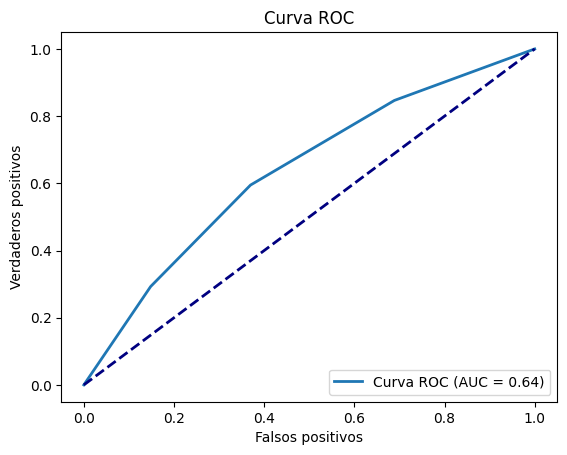

In [ ]:
#curva roc
y_score_bc = bc.predict_proba(x_test_sld)[:, 1]

fpr, tpr, thersholds=roc_curve(y_test, y_score_bc)
roc_auc_bc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_bc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#auc
auc_score_bc = roc_auc_score(out_bc["loan_status"], out_bc["pred_flag"])
auc_score_bc

0.6125641025641027

Con un AUC score de 0.6125 en los datos de prueba de un bagging classifier, podemos concluir que el modelo tiene un rendimiento medio para la tarea de clasificación. Esto sugiere que el modelo es capaz de distinguir entre las clases positivas y negativas mejor que un clasificador aleatorio, pero aún hay margen para mejorar su capacidad de discriminación.








###<code> 5.5 Random Forest </code

In [ ]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0 )
rf.fit(x_train_sld, y_train)
rf.score(x_train_sld, y_train)

0.6993406593406594

In [ ]:
rf_model = rf.score(x_test_sld, y_test)
rf_model

0.6387179487179487

Evaluamos modelo

In [ ]:
pred_proba_rf = rf.predict_proba(x_test_sld)[:,1]
pred_rf = rf.predict(x_test_sld)

out_rf = (df_test.assign(pred_prob=pred_proba_rf).assign(pred_flag=pred_rf).loc[:,["loan_status","pred_prob", "pred_flag"]])
out_rf

,loan_status,pred_prob,pred_flag
4158,0,0.486893,0
5717,0,0.503967,1
11576,1,0.481551,0
9173,1,0.501833,1
11411,1,0.471380,0
...,...,...,...
9743,1,0.491469,0
4855,0,0.620238,1
3280,0,0.511704,1
7321,1,0.570823,1


In [ ]:
#precision
precision_rf = precision_score(out_rf["loan_status"], out_rf["pred_flag"])
precision_rf

0.6529112492933861

In [ ]:
#recall
recall_rf = recall_score(out_rf["loan_status"], out_rf["pred_flag"])
recall_rf

0.5923076923076923

In [ ]:
#confusion matrix
cmat_rf = confusion_matrix(out_rf["loan_status"], out_rf["pred_flag"])
cmat_rf

#table
cmat_tab_rf = pd.DataFrame(index=["RealNo", "RealSi"], columns = ["PredNo", "PredSi"], data = cmat_rf)
cmat_tab_rf

,PredNo,PredSi
RealNo,1336,614
RealSi,795,1155


In [ ]:
#f_score
fscore_rf = f1_score(out_rf["loan_status"], out_rf["pred_flag"])
fscore_rf

0.6211347136326969

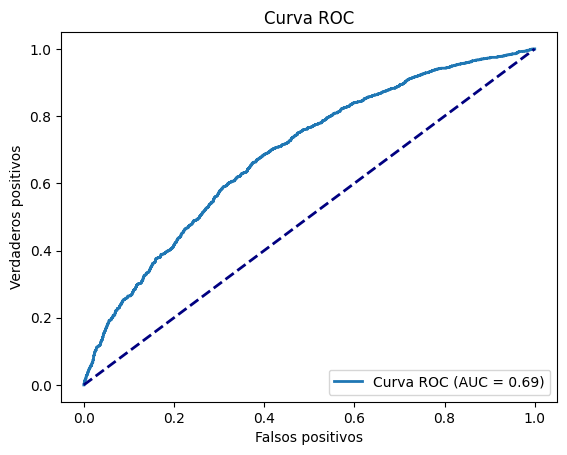

In [ ]:
#curva roc
y_score_rf = rf.predict_proba(x_test_sld)[:, 1]

fpr, tpr, thersholds=roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#auc
auc_score_rf = roc_auc_score(out_rf["loan_status"], out_rf["pred_flag"])
auc_score_rf

0.6387179487179486

Un AUC score de 0.6387 significa que el modelo tiene una capacidad moderada para distinguir entre las clases positiva y negativa. El modelo tiene una capacidad ligeramente mejor que un modelo aleatorio para clasificar los datos.

###<code> 5.6 GradientBoost </code





In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train_sld, y_train)
gb.score(x_train_sld, y_train)

0.6917582417582417

In [ ]:
gb_model = rf.score(x_test_sld, y_test)
gb_model

0.6387179487179487

In [ ]:
pred_proba_gb = gb.predict_proba(x_test_sld)[:,1]
pred_gb = gb.predict(x_test_sld)

out_gb = (df_test.assign(pred_prob=pred_proba_gb).assign(pred_flag=pred_gb).loc[:,["loan_status","pred_prob", "pred_flag"]])
out_gb

,loan_status,pred_prob,pred_flag
4158,0,0.485783,0
5717,0,0.614959,1
11576,1,0.443327,0
9173,1,0.474231,0
11411,1,0.491826,0
...,...,...,...
9743,1,0.428051,0
4855,0,0.660563,1
3280,0,0.558331,1
7321,1,0.751924,1


In [ ]:
#precision
precision_gb = precision_score(out_gb["loan_status"], out_gb["pred_flag"])
precision_gb

0.656198347107438

In [ ]:
#recall
recall_gb = recall_score(out_gb["loan_status"], out_gb["pred_flag"])
recall_gb

0.6107692307692307

In [ ]:
#confusion matrix
cmat_gb = confusion_matrix(out_gb["loan_status"], out_gb["pred_flag"])
cmat_gb

#table
cmat_tab_gb = pd.DataFrame(index=["RealNo", "RealSi"], columns = ["PredNo", "PredSi"], data = cmat_gb)
cmat_tab_gb

,PredNo,PredSi
RealNo,1326,624
RealSi,759,1191


In [ ]:
#f_score
fscore_gb = f1_score(out_gb["loan_status"], out_gb["pred_flag"])
fscore_gb

0.6326693227091633

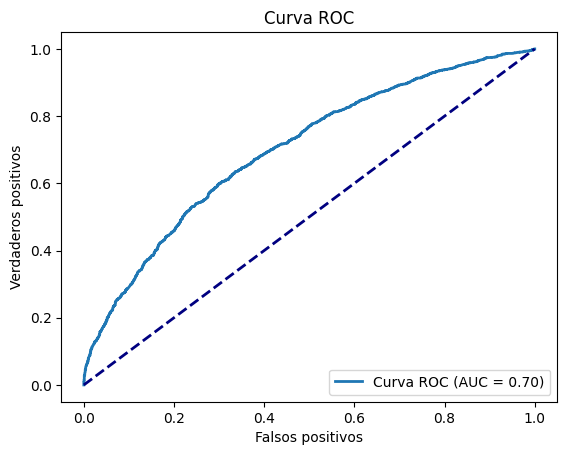

In [ ]:
#curva roc
y_score_gb = gb.predict_proba(x_test_sld)[:, 1]

fpr, tpr, thersholds=roc_curve(y_test, y_score_gb)
roc_auc_gb = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#auc
auc_score_gb = roc_auc_score(out_gb["loan_status"], out_gb["pred_flag"])
auc_score_gb

0.6453846153846153

Si el AUC score de los datos de prueba de un Gradient Boost es 0.64538, podemos concluir que el modelo tiene un rendimiento moderadamente bueno en la tarea de clasificación. Esto indica que el modelo es capaz de distinguir entre las clases positivas y negativas con un nivel de precisión aceptable, lo que sugiere un rendimiento prometedor en la tarea de clasificación.








###<code> 6  </code
¿Cuál de todas las métricas crees que es la más conveniente?. Ordena todos los métodos de mejor a peor según dichas métricas.

Para lo siguiente elaborare una tabla que contenga todos los datos que hemos sacado, y asi podemos hacer un orden de forma mas visual y facil

In [ ]:
accuracy = [lr_model, knn_model, tree_model, bc_model, rf_model, gb_model]
precision = [precision_lr, precision_knn, precision_tree, precision_bc, precision_rf, precision_gb]
recall = [recall_lr, recall_knn, recall_tree, recall_bc, recall_rf, recall_gb]
f_score = [fscore_lr, fscore_knn, fscore_tree, fscore_bc, fscore_rf, fscore_gb]
auc_ = [auc_score_lr, auc_score_knn, auc_score_tree, auc_score_bc, auc_score_rf, auc_score_gb]
models= ["Regresión logística", "K-nn", "Árbol de decisión", "Bagging classifier", "Random Forest", "GradientBoost"]

modelos_df = pd.DataFrame({"Modelo":models, "Accuracy":accuracy, "Precision":precision, "Recall": recall, "F-Score":f_score, "AUC": auc_}).set_index("Modelo").round(4)
modelos_df

,Accuracy,Precision,Recall,F-Score,AUC
Modelo,,,,,
Regresión logística,0.5641,0.5638,0.5662,0.5650,0.5641
K-nn,0.5238,0.5515,0.2554,0.3491,0.5238
Árbol de decisión,0.6269,0.6168,0.6703,0.6424,0.6269
Bagging classifier,0.6126,0.6167,0.5949,0.6056,0.6126
Random Forest,0.6387,0.6529,0.5923,0.6211,0.6387
GradientBoost,0.6387,0.6562,0.6108,0.6327,0.6454


###<code> 7 </code
En esta práctica no hemos abordado todavía la importancia de hacer una correcta preselección y transformación de variables antes de entrenar un modelo. Sin embargo , los ensambladores nos pueden dar una buena pista, de que variables elegir a la hora de entrenar un modelo de clasificación o regresión.  ¿Cómo medirías que importancia tiene cada variable a la hora de clasificar correctamente la variable objetivo? Haciendo uso de alguno de los métodos propuestos, Muestra una gráfica que presente de forma ordenada la importancia que tiene cada variable en la clasificación